In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

import os

%matplotlib widget

In [3]:
path = 'data/Processed/2021/01/01'

diffuse_data = []

for folder in os.listdir(path):
    data = sio.loadmat(f'{path}/{folder}/{folder}.mat')
    diffuse_data.append(data['covis']['grid'][0][0][0][0][0][0][8])

In [5]:
fig, ax = plt.subplots()
plt.imshow(data['covis']['grid'][0][0][0][0][0][0][8])
plt.show()

In [6]:
np.max(diffuse_data)

0.017491755053606995

In [7]:
plt.close('all')

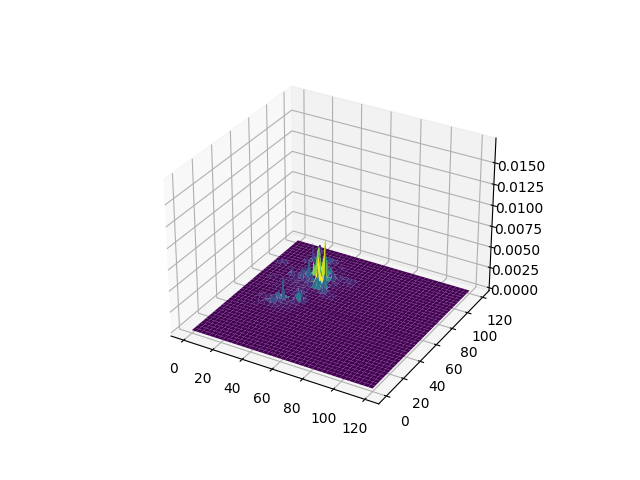

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(np.arange(0,121,1), np.arange(0,121,1))
surf = ax.plot_surface(X, Y, diffuse_data[0], cmap='viridis')

zmax = np.max(diffuse_data)
ax.set_zlim(0, zmax)

def animate(i):
    ax.clear()
    ax.plot_surface(X, Y, diffuse_data[i], cmap='viridis')
    ax.set_zlim(0, zmax)
    return 1

ani = animation.FuncAnimation(fig, animate, len(diffuse_data), interval = 100, repeat=True)
# ani.save(f'results/diffuse_20210101.mp4', fps=30)
plt.show()